In [1]:
import numpy as np
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt

## Simulation System 1

This system has patients with different CTAS levels (1 to 5) flowing into different departments (Triage, ED, and Inpatient). Along with this, patients undergo diagnostic tests at the Triage and ED levels. 

The simulation parameters are as follows: \
No. doctors: 100 \
No. nurses: 100 \
No. of admin staff: 70 \
No. of consultants: 10 
No. of ECG machines = 5 \
No. of CT machines = 5 \
No. of X-Ray machines = 5 


The simulation is run for 43800 minutes (i.e. one month) and LOS data from first 500 patients is discarded as warm-up data. In total 48k LOS data values are selected from each simulation run.

The seeds used for 5 rounds are: \
Round 1: 100 \
Round 2: 121 \
Round 3: 146 \
Round 4: 258 \
Round 5: 41

In [2]:
# Read simulation results as dataframe
df1 = pd.read_csv("../results/simulation_results_system_1_1.csv", sep=r",(?![^\[]*\])")
df2 = pd.read_csv("../results/simulation_results_system_1_2.csv", sep=r",(?![^\[]*\])")
df3 = pd.read_csv("../results/simulation_results_system_1_3.csv", sep=r",(?![^\[]*\])")
df4 = pd.read_csv("../results/simulation_results_system_1_4.csv", sep=r",(?![^\[]*\])")
df5 = pd.read_csv("../results/simulation_results_system_1_5.csv", sep=r",(?![^\[]*\])")
df_list = [df1, df2, df3, df4, df5]

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2911554503.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("../results/simulation_results_system_1_1.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2911554503.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("../results/simulation_results_system_1_2.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2911554503.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex se

In [3]:
for df in df_list:
    df.columns = df.columns.str.lstrip()

In [4]:
df1[:5]

,Patient ID,CTAS Level,Tests,Arrival Time,Departure Time,LOS,Triage Waiting Time,ED Waiting Time,Medication Waiting Time,Inpatient Waiting Time,Triage Waiting Room Length,ED Waiting Room Length,Medication Waiting Room Length,Inpatient Waiting Room Length
0,1,1,[],0.000000,12.087052,12.087052,0.0,0.0,0.000000,0.0,1,1,11,1
1,2,3,"['Triage ECG', 'Triage Urine', 'Triage X-Ray']",0.365564,125.128323,124.762759,0.0,0.0,2.288108,0.0,1,1,11,1
2,3,0,[],1.682179,3.000000,1.317821,0.0,0.0,0.000000,0.0,1,1,11,1
3,4,0,[],1.752360,1.000000,-0.752360,0.0,0.0,0.000000,0.0,1,1,11,1
4,5,1,['ED Blood Test'],2.119050,20.747604,18.628554,0.0,0.0,0.000000,0.0,1,1,11,1


In [5]:
# Read LOS data from dataframe df
# LOS values of only treated patients is considered
# Treated patients are the ones that complete their run (arrival to departure) in the ER

los_vals_1 = []
los_vals_2 = []
los_vals_3 = []
los_vals_4 = []
los_vals_5 = []

for items in df1["LOS"]:
    if items > 0:
        los_vals_1.append(items/60)

for items in df2["LOS"]:
    if items > 0:
        los_vals_2.append(items/60)
        
for items in df3["LOS"]:
    if items > 0:
        los_vals_3.append(items/60)
        
for items in df4["LOS"]:
    if items > 0:
        los_vals_4.append(items/60)
        
for items in df5["LOS"]:
    if items > 0:
        los_vals_5.append(items/60)

los_vals_list = [los_vals_1, los_vals_2, los_vals_3, los_vals_4, los_vals_5]
print(min(los_vals_1), max(los_vals_1))

0.021963686453102708 4.939417969677986


In [6]:
mean_list = []
std_dev_list = []
n_list = []

for los_vals in los_vals_list:
    los_vals = np.array(los_vals)
    mean_list.append(np.mean(los_vals))
    std_dev_list.append(np.std(los_vals))

    n_list.append(len(los_vals))

print(mean_list, std_dev_list, n_list)

[1.3500221674938453, 1.3414928843993035, 1.3547351984227924, 1.3449575954884556, 1.343120719082215] [0.6973908223841953, 0.6758623834496429, 0.6902964671018932, 0.6855768345520872, 0.6826387425221883] [48489, 48315, 48587, 48169, 48229]


In [7]:
# Check critical values from table/ppf function
alpha = 0.05
t_critical_list = []

for n in n_list:
    dof = n - 1
    t_critical_list.append(t.ppf(1-alpha/2, dof))

print(t_critical_list)

[1.96001291065459, 1.9600130868634233, 1.960012811966148, 1.960013235699088, 1.960013174424674]


In [8]:
# Calculate confidence interval
# H_val = t_critical * std_dev * (np.sqrt(1 + (1/n)))

H_val_list = []
lower_bound = []
upper_bound = []

for index, t_critical in enumerate(t_critical_list):
    H_val = t_critical * std_dev_list[index] * (1/np.sqrt(n_list[index]))
    H_val_list.append(H_val)
    lower_bound.append(mean_list[index] - H_val)
    upper_bound.append(mean_list[index] + H_val)

print(lower_bound, upper_bound, H_val_list)
# print([mean - lower_bound], [upper_bound - mean])

[1.3438147129776055, 1.335466230453598, 1.3485970905199605, 1.3388350598271177, 1.337028215481172] [1.3562296220100851, 1.347519538345009, 1.3608733063256244, 1.3510801311497935, 1.349213222683258] [0.0062074545162398576, 0.006026653945705488, 0.006138107902831908, 0.00612253566133781, 0.006092503601043148]


In [9]:
# Across rep data
var_list = [a**2 for a in std_dev_list]

a_mean = sum(mean_list)/5

a_var = 0
for means in mean_list:
    a_var += (means - a_mean) ** 2

a_var = a_var/4
a_std_dev = np.sqrt(a_var)

a_H_val = t_critical_list[0] * a_std_dev * (1/np.sqrt(5))

print(a_mean, a_std_dev, a_H_val, var_list, a_var)

1.3468657129773223 0.00544116680606813 0.004769424407590371 [0.4863539591457042, 0.4567899613622321, 0.4765092124933551, 0.4700155960744599, 0.46599565279227445] 2.9606296211457652e-05


In [10]:
a_lower_bound = a_mean - a_H_val
a_upper_bound = a_mean + a_H_val
print(a_lower_bound, a_upper_bound)

1.3420962885697318 1.3516351373849127


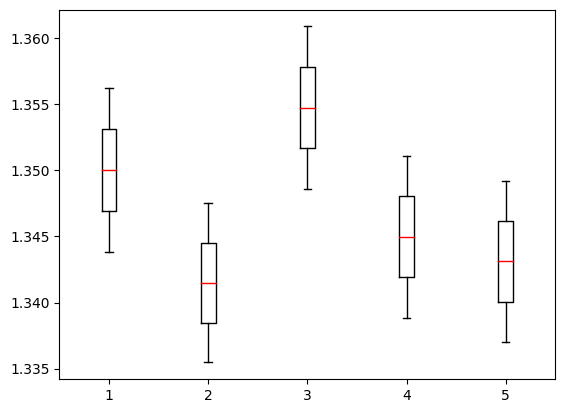

In [11]:
# Plot boxplot for confidence intervals
# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8))
interval_list = []
for index, mean in enumerate(mean_list):
    interval_list.append([lower_bound[index], mean, upper_bound[index]])

for index, interval in enumerate(interval_list):
    plt.boxplot(interval, medianprops=dict(color="red"), positions=[index+1])
    # plt.plot((index, index, index), interval)
    # plt.axhline(y=interval[1], color='orange', linestyle='--')
    
plt.show()

In [12]:
# Drawing bar graph with error bars to show confidence interval

# fig, ax = plt.subplots()
# ax.bar(0, los_vals, yerr=[[mean - lower_bound], [upper_bound - mean]], align='center', alpha=0.5, ecolor='black', capsize=10)

# ax.set_ylabel('Mean LOS')
# ax.set_xticks([0])
# ax.set_xticklabels(['Hospital A'])
# ax.set_title('Mean LOS')

# plt.show()

## Simulation System 2

This system has patients with different CTAS levels (1 to 5) flowing into different departments (Triage, ED, and Inpatient). Along with this, patients undergo diagnostic tests at the Triage and ED levels. 

The simulation parameters are as follows: \
No. doctors: 50 \
No. nurses: 50 \
No. of admin staff: 35 \
No. of consultants: 5 \
No. of ECG machines = 5 \
No. of CT machines = 5 \
No. of X-Ray machines = 5 


The simulation is run for 43800 minutes (i.e. one month) and LOS data from first 500 patients is discarded as warm-up data. In total 48k LOS data values are selected from each simulation run.

The seeds used for 5 rounds are: \
Round 1: 100 \
Round 2: 121 \
Round 3: 146 \
Round 4: 258 \
Round 5: 41

In [13]:
# Read simulation results as dataframe
df21 = pd.read_csv("../results/simulation_results_system_2_1.csv", sep=r",(?![^\[]*\])")
df22 = pd.read_csv("../results/simulation_results_system_2_2.csv", sep=r",(?![^\[]*\])")
df23 = pd.read_csv("../results/simulation_results_system_2_3.csv", sep=r",(?![^\[]*\])")
df24 = pd.read_csv("../results/simulation_results_system_2_4.csv", sep=r",(?![^\[]*\])")
df25 = pd.read_csv("../results/simulation_results_system_2_5.csv", sep=r",(?![^\[]*\])")
df_list = [df21, df22, df23, df24, df25]

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/1323493655.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df21 = pd.read_csv("../results/simulation_results_system_2_1.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/1323493655.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df22 = pd.read_csv("../results/simulation_results_system_2_2.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/1323493655.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex 

In [14]:
for df in df_list:
    df.columns = df.columns.str.lstrip()

In [15]:
# Read LOS data from dataframe df
# LOS values of only treated patients is considered
# Treated patients are the ones that complete their run (arrival to departure) in the ER

los_vals_1 = []
los_vals_2 = []
los_vals_3 = []
los_vals_4 = []
los_vals_5 = []

for items in df21["LOS"]:
    if items > 0:
        los_vals_1.append(items/60)

for items in df22["LOS"]:
    if items > 0:
        los_vals_2.append(items/60)
        
for items in df23["LOS"]:
    if items > 0:
        los_vals_3.append(items/60)
        
for items in df24["LOS"]:
    if items > 0:
        los_vals_4.append(items/60)
        
for items in df25["LOS"]:
    if items > 0:
        los_vals_5.append(items/60)

los_vals_list = [los_vals_1, los_vals_2, los_vals_3, los_vals_4, los_vals_5]
print(min(los_vals_1), max(los_vals_1))

0.021963686453102708 12.765299250618007


In [16]:
mean_list = []
std_dev_list = []
n_list = []

for los_vals in los_vals_list:
    los_vals = np.array(los_vals[100:])
    mean_list.append(np.mean(los_vals))
    std_dev_list.append(np.std(los_vals))

    n_list.append(len(los_vals))

print(mean_list, std_dev_list, n_list)

[3.717666648532128, 5.789356580353491, 4.2921867461067125, 4.57385508930156, 3.6098085076313375] [2.5108867243352533, 3.975041268291581, 3.0896117871662283, 3.3616222650645744, 2.4262541657996213] [825, 986, 782, 978, 597]


In [17]:
# Check critical values from table/ppf function
alpha = 0.05
t_critical_list = []

for n in n_list:
    dof = n - 1
    t_critical_list.append(t.ppf(1-alpha/2, dof))

print(t_critical_list)

[1.9628471160446757, 1.9623752935218566, 1.963006096420354, 1.9623950621797075, 1.9639522633469966]


In [18]:
# Calculate confidence interval
# H_val = t_critical * std_dev * (np.sqrt(1 + (1/n)))

H_val_list = []
lower_bound = []
upper_bound = []

for index, t_critical in enumerate(t_critical_list):
    H_val = t_critical * std_dev_list[index] * (1/np.sqrt(n_list[index]))
    H_val_list.append(H_val)
    lower_bound.append(mean_list[index] - H_val)
    upper_bound.append(mean_list[index] + H_val)

print(lower_bound, upper_bound, H_val_list)
# print([mean - lower_bound], [upper_bound - mean])

[3.5460787638200872, 5.540937327219532, 4.075305407460847, 4.362911696662923, 3.414788101764191] [3.8892545332441686, 6.0377758334874505, 4.509068084752578, 4.7847984819401965, 3.804828913498484] [0.17158788471204073, 0.24841925313395924, 0.21688133864586562, 0.21094339263863704, 0.19502040586714642]


In [19]:
# Across rep data
var_list = [a**2 for a in std_dev_list]

a_mean = sum(mean_list)/5

a_var = 0
for means in mean_list:
    a_var += (means - a_mean) ** 2

a_var = a_var/4
a_std_dev = np.sqrt(a_var)

a_H_val = t_critical_list[0] * a_std_dev * (1/np.sqrt(5))

print(a_mean, a_std_dev, a_H_val, var_list, a_var, a_std_dev)

4.3965747143850455 0.8749405310351286 0.7680332240941725 [6.304552142443018, 15.80095308462114, 9.545700995396496, 11.30050425297788, 5.8867092770600165] 0.7655209328480329 0.8749405310351286


In [20]:
a_lower_bound = a_mean - a_H_val
a_upper_bound = a_mean + a_H_val
print(a_lower_bound, a_upper_bound)

3.628541490290873 5.164607938479218


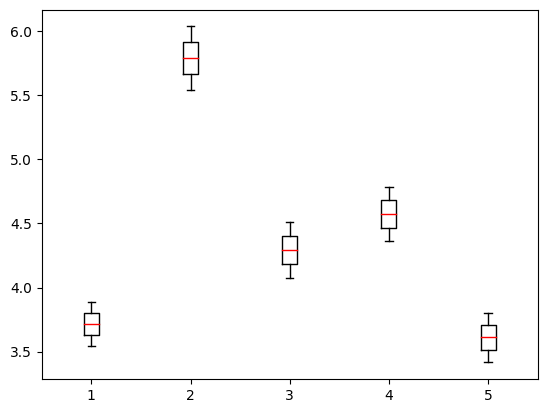

In [21]:
# Plot boxplot for confidence intervals
# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8))
interval_list = []
for index, mean in enumerate(mean_list):
    interval_list.append([lower_bound[index], mean, upper_bound[index]])

for index, interval in enumerate(interval_list):
    plt.boxplot(interval, medianprops=dict(color="red"), positions=[index+1])
    # plt.plot((index, index, index), interval)
    # plt.axhline(y=interval[1], color='orange', linestyle='--')
    
plt.show()

## Simulation System 3

In [22]:
# Read simulation results as dataframe
df31 = pd.read_csv("../results/simulation_results_system_3_1.csv", sep=r",(?![^\[]*\])")
df32 = pd.read_csv("../results/simulation_results_system_3_2.csv", sep=r",(?![^\[]*\])")
df33 = pd.read_csv("../results/simulation_results_system_3_3.csv", sep=r",(?![^\[]*\])")
df34 = pd.read_csv("../results/simulation_results_system_3_4.csv", sep=r",(?![^\[]*\])")
df35 = pd.read_csv("../results/simulation_results_system_3_5.csv", sep=r",(?![^\[]*\])")
df_list = [df31, df32, df33, df34, df35]

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2571389373.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df31 = pd.read_csv("../results/simulation_results_system_3_1.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2571389373.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df32 = pd.read_csv("../results/simulation_results_system_3_2.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2571389373.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex 

In [23]:
for df in df_list:
    df.columns = df.columns.str.lstrip()

In [24]:
# Read LOS data from dataframe df
# LOS values of only treated patients is considered
# Treated patients are the ones that complete their run (arrival to departure) in the ER

los_vals_1 = []
los_vals_2 = []
los_vals_3 = []
los_vals_4 = []
los_vals_5 = []

for items in df31["LOS"]:
    if items > 0:
        los_vals_1.append(items/60)

for items in df32["LOS"]:
    if items > 0:
        los_vals_2.append(items/60)
        
for items in df33["LOS"]:
    if items > 0:
        los_vals_3.append(items/60)
        
for items in df34["LOS"]:
    if items > 0:
        los_vals_4.append(items/60)
        
for items in df35["LOS"]:
    if items > 0:
        los_vals_5.append(items/60)

los_vals_list = [los_vals_1, los_vals_2, los_vals_3, los_vals_4, los_vals_5]
print(min(los_vals_1), max(los_vals_1))

0.11474575650742433 4.269948557028329


In [25]:
mean_list = []
std_dev_list = []
n_list = []

for los_vals in los_vals_list:
    los_vals = np.array(los_vals)
    mean_list.append(np.mean(los_vals))
    std_dev_list.append(np.std(los_vals))

    n_list.append(len(los_vals))

print(mean_list, std_dev_list, n_list)

[1.337885240899884, 1.340700036492139, 1.3361626807080496, 1.3336513304044078, 1.344770701924256] [0.6763513531060613, 0.6747181128613373, 0.67095803236982, 0.6645243883201893, 0.6784651743989605] [47490, 47223, 47198, 47136, 47248]


In [26]:
# Check critical values from table/ppf function
alpha = 0.05
t_critical_list = []

for n in n_list:
    dof = n - 1
    t_critical_list.append(t.ppf(1-alpha/2, dof))

print(t_critical_list)

[1.9600139399121654, 1.9600142223741623, 1.960014248985547, 1.9600143151035971, 1.960014195790941]


In [27]:
# Calculate confidence interval
# H_val = t_critical * std_dev * (np.sqrt(1 + (1/n)))

H_val_list = []
lower_bound = []
upper_bound = []

for index, t_critical in enumerate(t_critical_list):
    H_val = t_critical * std_dev_list[index] * (1/np.sqrt(n_list[index]))
    H_val_list.append(H_val)
    lower_bound.append(mean_list[index] - H_val)
    upper_bound.append(mean_list[index] + H_val)

print(lower_bound, upper_bound, H_val_list)
# print([mean - lower_bound], [upper_bound - mean])

[1.3318020641044055, 1.3346144168515017, 1.3301093724971078, 1.3276521239885921, 1.3386529049230875] [1.3439684176953626, 1.3467856561327765, 1.3422159889189913, 1.3396505368202234, 1.3508884989254246] [0.0060831767954785424, 0.006085619640637368, 0.00605330821094165, 0.0059992064158156675, 0.006117797001168613]


In [28]:
# Across rep data
var_list = [a**2 for a in std_dev_list]

a_mean = sum(mean_list)/5

a_var = 0
for means in mean_list:
    a_var += (means - a_mean) ** 2

a_var = a_var/4
a_std_dev = np.sqrt(a_var)

a_H_val = t_critical_list[0] * a_std_dev * (1/np.sqrt(5))

print(a_mean, a_std_dev, a_H_val, var_list, a_var, a_std_dev)

1.3386339980857473 0.004284351550281926 0.0037554264210814506 [0.45745115284840004, 0.4552445318231643, 0.4501846812015804, 0.4415926626723218, 0.46031499287221184] 1.835566820640315e-05 0.004284351550281926


In [29]:
a_lower_bound = a_mean - a_H_val
a_upper_bound = a_mean + a_H_val
print(a_lower_bound, a_upper_bound)

1.3348785716646658 1.3423894245068289


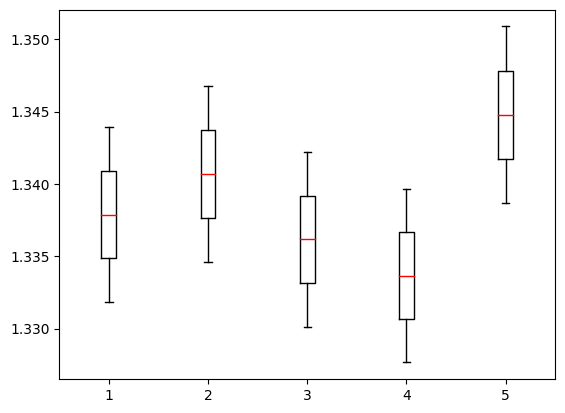

In [30]:
# Plot boxplot for confidence intervals
# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8))
interval_list = []
for index, mean in enumerate(mean_list):
    interval_list.append([lower_bound[index], mean, upper_bound[index]])

for index, interval in enumerate(interval_list):
    plt.boxplot(interval, medianprops=dict(color="red"), positions=[index+1])
    # plt.plot((index, index, index), interval)
    # plt.axhline(y=interval[1], color='orange', linestyle='--')
    
plt.show()

## Simulation System 4

Please note, simulation system 4 is presented as system 5 in the report. 

In [31]:
# Read simulation results as dataframe
df41 = pd.read_csv("../results/simulation_results_system_4_1.csv", sep=r",(?![^\[]*\])")
df42 = pd.read_csv("../results/simulation_results_system_4_2.csv", sep=r",(?![^\[]*\])")
df43 = pd.read_csv("../results/simulation_results_system_4_3.csv", sep=r",(?![^\[]*\])")
df44 = pd.read_csv("../results/simulation_results_system_4_4.csv", sep=r",(?![^\[]*\])")
df45 = pd.read_csv("../results/simulation_results_system_4_5.csv", sep=r",(?![^\[]*\])")
df_list = [df41, df42, df43, df44, df45]

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2783056028.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df41 = pd.read_csv("../results/simulation_results_system_4_1.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2783056028.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df42 = pd.read_csv("../results/simulation_results_system_4_2.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/2783056028.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex 

In [32]:
for df in df_list:
    df.columns = df.columns.str.lstrip()

In [33]:
# Read LOS data from dataframe df
# LOS values of only treated patients is considered
# Treated patients are the ones that complete their run (arrival to departure) in the ER

los_vals_1 = []
los_vals_2 = []
los_vals_3 = []
los_vals_4 = []
los_vals_5 = []

for items in df41["LOS"]:
    if items > 0:
        los_vals_1.append(items/60)

for items in df42["LOS"]:
    if items > 0:
        los_vals_2.append(items/60)
        
for items in df43["LOS"]:
    if items > 0:
        los_vals_3.append(items/60)
        
for items in df44["LOS"]:
    if items > 0:
        los_vals_4.append(items/60)
        
for items in df45["LOS"]:
    if items > 0:
        los_vals_5.append(items/60)

los_vals_list = [los_vals_1, los_vals_2, los_vals_3, los_vals_4, los_vals_5]
print(min(los_vals_1), max(los_vals_1))

0.10359808058747148 4.0180206389295865


In [34]:
mean_list = []
std_dev_list = []
n_list = []

for los_vals in los_vals_list:
    los_vals = np.array(los_vals[100:90100])
    mean_list.append(np.mean(los_vals))
    std_dev_list.append(np.std(los_vals))

    n_list.append(len(los_vals))

print(mean_list, std_dev_list, n_list)

[1.3325258624173035, 1.3283533965622136, 1.3257924382439046, 1.3260836275378187, 1.3284998298904194] [0.6660908812265884, 0.6564414318357703, 0.6547254705004996, 0.6592036967239159, 0.6628951868324748] [90000, 90000, 90000, 90000, 90000]


In [35]:
# Check critical values from table/ppf function
alpha = 0.05
t_critical_list = []

for n in n_list:
    dof = n - 1
    t_critical_list.append(t.ppf(1-alpha/2, dof))

print(t_critical_list)

[1.9599903437506236, 1.9599903437506236, 1.9599903437506236, 1.9599903437506236, 1.9599903437506236]


In [36]:
# Calculate confidence interval
# H_val = t_critical * std_dev * (np.sqrt(1 + (1/n)))

H_val_list = []
lower_bound = []
upper_bound = []

for index, t_critical in enumerate(t_critical_list):
    H_val = t_critical * std_dev_list[index] * (1/np.sqrt(n_list[index]))
    H_val_list.append(H_val)
    lower_bound.append(mean_list[index] - H_val)
    upper_bound.append(mean_list[index] + H_val)

print(lower_bound, upper_bound, H_val_list)
# print([mean - lower_bound], [upper_bound - mean])

[1.3281740900997554, 1.324064667003427, 1.321514919577276, 1.3217768512706733, 1.324168936006718] [1.3368776347348517, 1.3326421261210002, 1.3300699569105332, 1.330390403804964, 1.3328307237741208] [0.00435177231754819, 0.004288729558786477, 0.004277518666628543, 0.004306776267145299, 0.004330893883701388]


In [37]:
# Across rep data
var_list = [a**2 for a in std_dev_list]

a_mean = sum(mean_list)/5

a_var = 0
for means in mean_list:
    a_var += (means - a_mean) ** 2

a_var = a_var/4
a_std_dev = np.sqrt(a_var)

a_H_val = t_critical_list[0] * a_std_dev * (1/np.sqrt(5))

print(a_mean, a_std_dev, a_H_val, var_list, a_var, a_std_dev)

1.3282510309303321 0.00269670536723827 0.0023637548289732104 [0.44367706205321317, 0.4309153534305963, 0.4286654417221005, 0.4345495137744765, 0.4394300287256617] 7.272219837691693e-06 0.00269670536723827


In [38]:
a_lower_bound = a_mean - a_H_val
a_upper_bound = a_mean + a_H_val
print(a_lower_bound, a_upper_bound)

1.325887276101359 1.3306147857593054


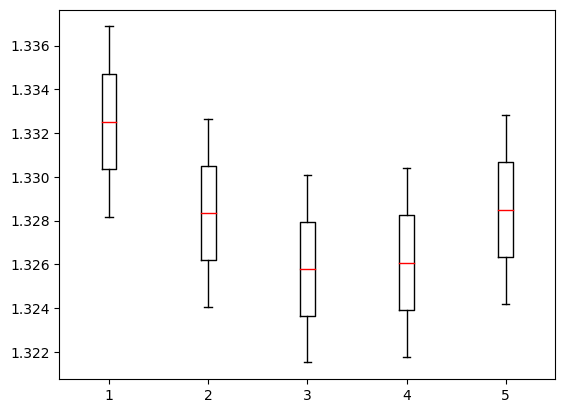

In [39]:
# Plot boxplot for confidence intervals
# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8))
interval_list = []
for index, mean in enumerate(mean_list):
    interval_list.append([lower_bound[index], mean, upper_bound[index]])

for index, interval in enumerate(interval_list):
    plt.boxplot(interval, medianprops=dict(color="red"), positions=[index+1])
    # plt.plot((index, index, index), interval)
    # plt.axhline(y=interval[1], color='orange', linestyle='--')
    
plt.show()

## Simulation System 5


Please note, this simulation system is presented as system 4 in the report. 

In [40]:
# Read simulation results as dataframe
df41 = pd.read_csv("../results/simulation_results_system_5_1.csv", sep=r",(?![^\[]*\])")
df42 = pd.read_csv("../results/simulation_results_system_5_2.csv", sep=r",(?![^\[]*\])")
df43 = pd.read_csv("../results/simulation_results_system_5_3.csv", sep=r",(?![^\[]*\])")
df44 = pd.read_csv("../results/simulation_results_system_5_4.csv", sep=r",(?![^\[]*\])")
df45 = pd.read_csv("../results/simulation_results_system_5_5.csv", sep=r",(?![^\[]*\])")
df_list = [df41, df42, df43, df44, df45]

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/495048192.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df41 = pd.read_csv("../results/simulation_results_system_5_1.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/495048192.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df42 = pd.read_csv("../results/simulation_results_system_5_2.csv", sep=r",(?![^\[]*\])")
/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6791/495048192.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex sep

In [41]:
for df in df_list:
    df.columns = df.columns.str.lstrip()

In [42]:
# Read LOS data from dataframe df
# LOS values of only treated patients is considered
# Treated patients are the ones that complete their run (arrival to departure) in the ER

los_vals_1 = []
los_vals_2 = []
los_vals_3 = []
los_vals_4 = []
los_vals_5 = []

for items in df41["LOS"]:
    if items > 0:
        los_vals_1.append(items/60)

for items in df42["LOS"]:
    if items > 0:
        los_vals_2.append(items/60)
        
for items in df43["LOS"]:
    if items > 0:
        los_vals_3.append(items/60)
        
for items in df44["LOS"]:
    if items > 0:
        los_vals_4.append(items/60)
        
for items in df45["LOS"]:
    if items > 0:
        los_vals_5.append(items/60)

los_vals_list = [los_vals_1, los_vals_2, los_vals_3, los_vals_4, los_vals_5]
print(min(los_vals_1), max(los_vals_1))

0.13884777294015294 22.737922349409406


In [43]:
mean_list = []
std_dev_list = []
n_list = []

for los_vals in los_vals_list:
    los_vals = np.array(los_vals[100:90100])
    mean_list.append(np.mean(los_vals))
    std_dev_list.append(np.std(los_vals))

    n_list.append(len(los_vals))

print(mean_list, std_dev_list, n_list)

[4.252080105808182, 4.223080759046099, 3.6955200636221366, 4.706032683692952, 4.193880159542005] [3.3901592317724254, 3.0665125984007244, 2.7731345734386332, 3.5831767741357483, 3.1789715878181934] [1525, 1701, 1487, 2057, 1699]


In [44]:
# Check critical values from table/ppf function
alpha = 0.05
t_critical_list = []

for n in n_list:
    dof = n - 1
    t_critical_list.append(t.ppf(1-alpha/2, dof))

print(t_critical_list)

[1.9615218089261413, 1.9613604153684672, 1.961561677529042, 1.9611184809630702, 1.9613620613162466]


In [45]:
# Calculate confidence interval
# H_val = t_critical * std_dev * (np.sqrt(1 + (1/n)))

H_val_list = []
lower_bound = []
upper_bound = []

for index, t_critical in enumerate(t_critical_list):
    H_val = t_critical * std_dev_list[index] * (1/np.sqrt(n_list[index]))
    H_val_list.append(H_val)
    lower_bound.append(mean_list[index] - H_val)
    upper_bound.append(mean_list[index] + H_val)

print(lower_bound, upper_bound, H_val_list)
# print([mean - lower_bound], [upper_bound - mean])

[4.08179435196429, 4.077249709142288, 3.5544556625416677, 4.551095762785237, 4.042611928765038] [4.422365859652074, 4.36891180894991, 3.8365844647026055, 4.860969604600666, 4.345148390318973] [0.1702857538438924, 0.14583104990381132, 0.14106440108046892, 0.1549369209077148, 0.15126823077696752]


In [46]:
# Across rep data
var_list = [a**2 for a in std_dev_list]

a_mean = sum(mean_list)/5

a_var = 0
for means in mean_list:
    a_var += (means - a_mean) ** 2

a_var = a_var/4
a_std_dev = np.sqrt(a_var)

a_H_val = t_critical_list[0] * a_std_dev * (1/np.sqrt(5))

print(a_mean, a_std_dev, a_H_val, var_list, a_var, a_std_dev)

4.214118754342275 0.3580694410162585 0.3141053960482512 [11.493179616771801, 9.403499516150363, 7.69027536240067, 12.839155794705867, 10.105860356155326] 0.1282137245896958 0.3580694410162585


In [47]:
a_lower_bound = a_mean - a_H_val
a_upper_bound = a_mean + a_H_val
print(a_lower_bound, a_upper_bound)

3.9000133582940237 4.5282241503905265


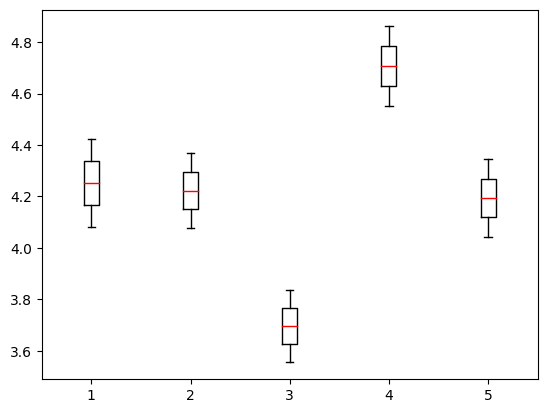

In [48]:
# Plot boxplot for confidence intervals
# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8))
interval_list = []
for index, mean in enumerate(mean_list):
    interval_list.append([lower_bound[index], mean, upper_bound[index]])

for index, interval in enumerate(interval_list):
    plt.boxplot(interval, medianprops=dict(color="red"), positions=[index+1])
    # plt.plot((index, index, index), interval)
    # plt.axhline(y=interval[1], color='orange', linestyle='--')
    
plt.show()